In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

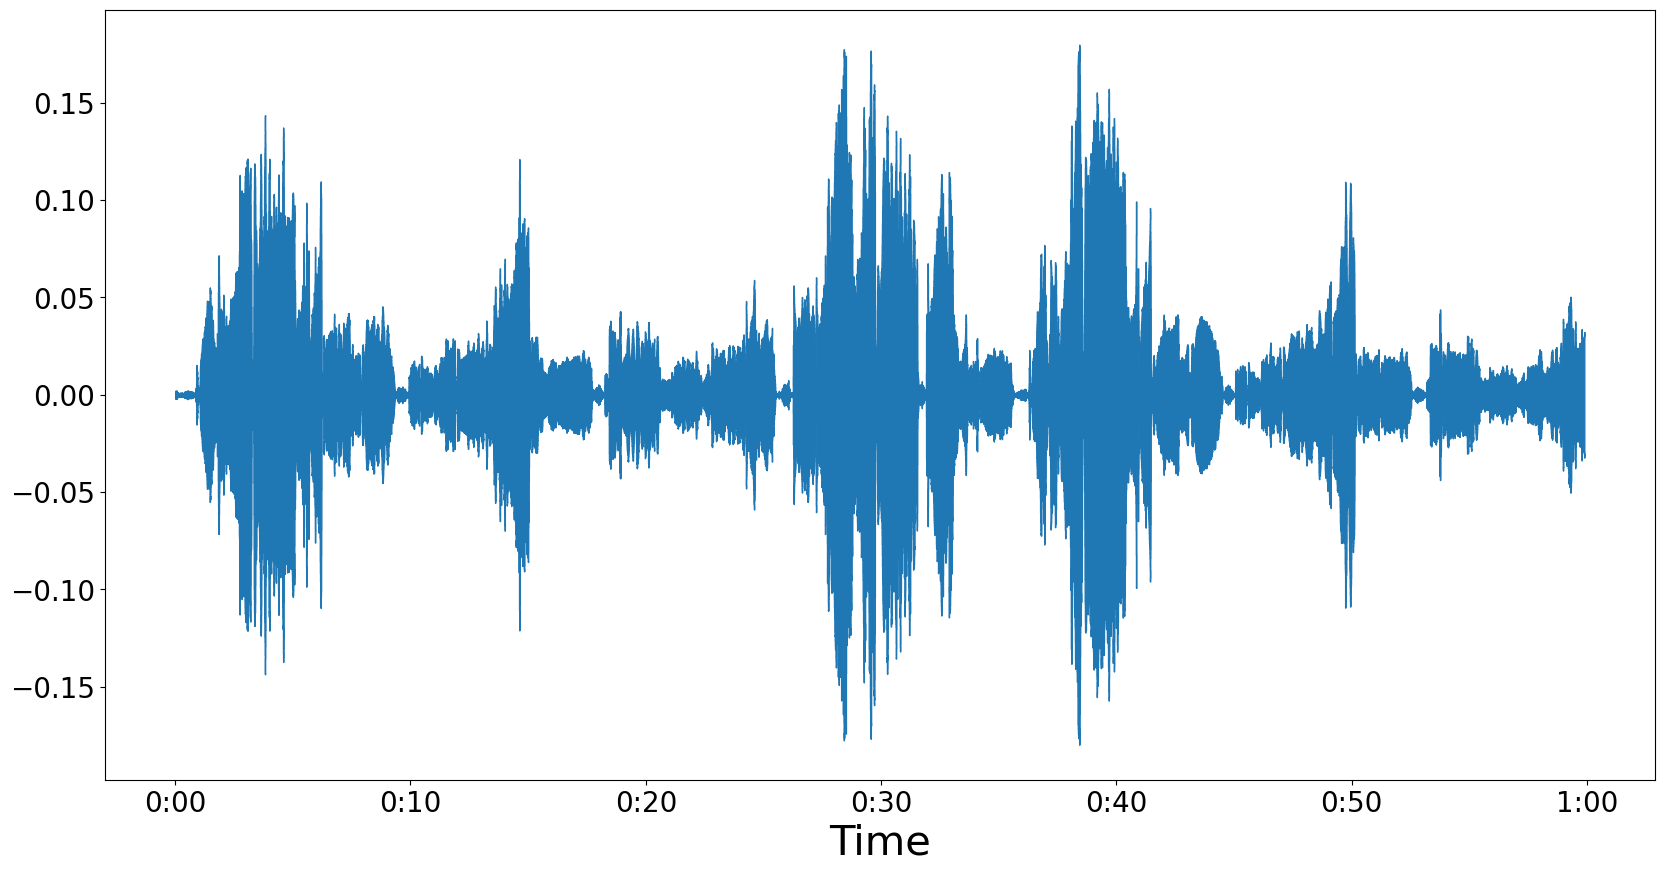

In [2]:
fig,ax=plt.subplots(figsize=(20,10))
y, sr = librosa.load("./嗓音测试数据/唱音/soundfile.wav")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#设置colorbar的字体大小
plt.rcParams['font.size'] = 20
#设置两个坐标轴lable的字体大小
ax.set_xlabel('Time(s)', fontsize=30)
librosa.display.waveshow(y)

# Envelope Detection

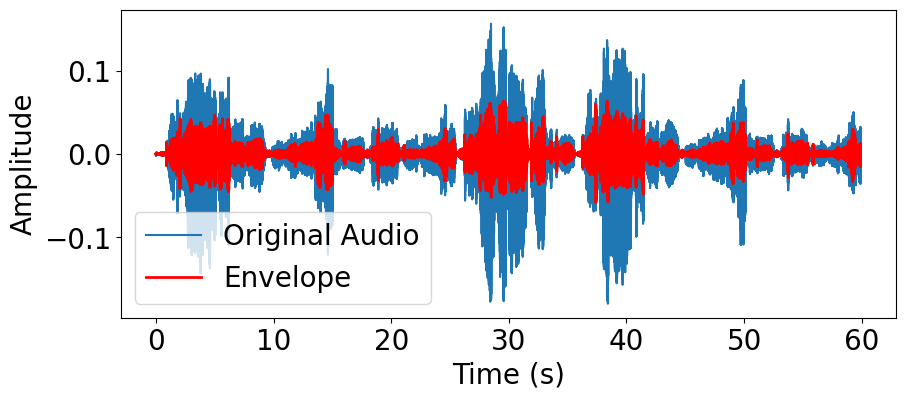

In [8]:
# Load the audio file
audio_file = "./嗓音测试数据/唱音/soundfile.wav"
audio, sr = librosa.load(audio_file, sr=None)

# Calculate the absolute value of the audio signal
abs_audio = np.abs(audio)

# Apply a low-pass filter to smoothen the envelope
envelope = librosa.effects.preemphasis(abs_audio)

# Plotting the original audio and its envelope
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio)) / sr, audio, label='Original Audio')
plt.plot(np.arange(len(envelope)) / sr, envelope, color='r', linewidth=2, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

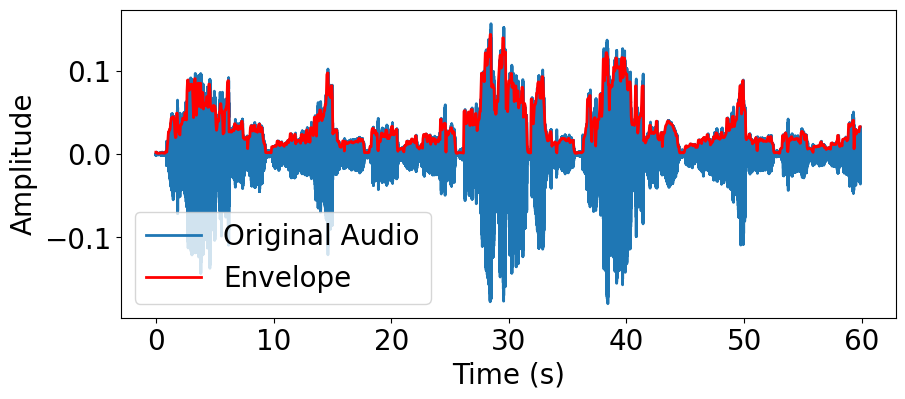

In [11]:
from scipy.signal import butter, filtfilt

def amplitude_envelope_hop(signal, frame_size, hop_length):
    amplitude_envelope = []
    # calculate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i + frame_size])# 末尾不会截断，而是将不足一个frame的进行同样的处理
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)


def apply_lowpass_filter(data, sr, cutoff_freq):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


# Load the audio file
audio_file = "./嗓音测试数据/唱音/soundfile.wav"
audio, sr = librosa.load(audio_file, sr=None)


FRAME_SIZE = 2048
HOP_LENGTH = 1024


cutoff_freq = 2000
audio_sm = apply_lowpass_filter(audio, sr, cutoff_freq)

ae_source_hop = amplitude_envelope_hop(audio_sm, FRAME_SIZE, HOP_LENGTH)
frames = range(0, len(ae_source_hop))
# ae_source_hop=librosa.amplitude_to_db(ae_source_hop,ref=np.min)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


# cutoff_freq = 800
# envelope = apply_lowpass_filter(ae_source_hop, sr, cutoff_freq)
envelope = ae_source_hop


# Plotting the original audio and its envelope
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio)) / sr, audio, label='Original Audio', linewidth=2)
plt.plot(np.arange(len(envelope)) / sr * HOP_LENGTH, envelope, color='r', linewidth=2, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# print(len(ae_source_hop))
# print(len(audio))

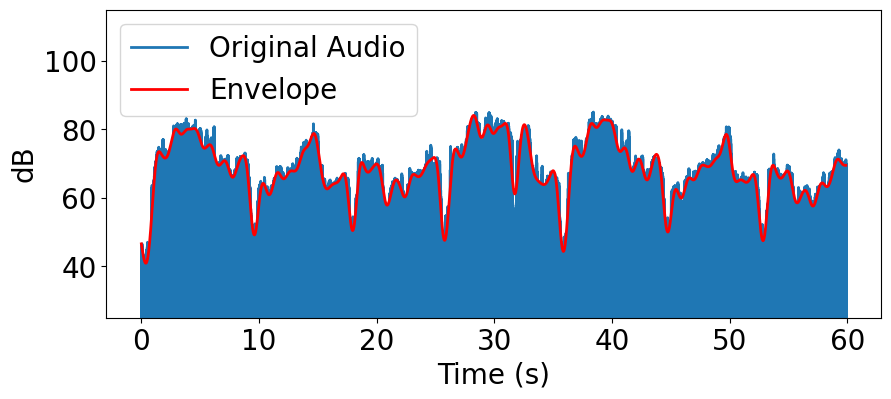

In [13]:
from scipy.signal import butter, filtfilt

def amplitude_envelope_hop(signal, frame_size, hop_length):
    amplitude_envelope = []
    # calculate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i + frame_size])# 末尾不会截断，而是将不足一个frame的进行同样的处理
        amplitude_envelope.append(current_frame_amplitude_envelope)

    return np.array(amplitude_envelope)


def apply_lowpass_filter(data, sr, cutoff_freq):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(4, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data


# Load the audio file
audio_file = "./嗓音测试数据/唱音/soundfile.wav"
audio, sr = librosa.load(audio_file, sr=None)


FRAME_SIZE = 1024
HOP_LENGTH = 512


audio_spl = librosa.amplitude_to_db(audio, ref = np.min)
ae_source_hop = amplitude_envelope_hop(audio_spl, FRAME_SIZE, HOP_LENGTH)
frames = range(0, len(ae_source_hop))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)


cutoff_freq = 500
envelope = apply_lowpass_filter(ae_source_hop, sr, cutoff_freq)
env_spl = envelope
# envelope = apply_lowpass_filter(ae_source_hop, sr, cutoff_freq)
# env_spl=librosa.amplitude_to_db(ae_source_hop,ref=np.min)
# audio_spl = librosa.amplitude_to_db(audio, ref = np.min)


# Plotting the original audio and its envelope
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(audio_spl)) / sr, audio_spl, label='Original Audio', linewidth=2)
plt.plot(np.arange(len(env_spl)) / sr * HOP_LENGTH, env_spl, color='r', linewidth=2, label='Envelope')
plt.xlabel('Time (s)')
plt.ylabel('dB')
plt.ylim(25, 115)
plt.legend()
plt.show()


# print(len(ae_source_hop))
# print(len(audio))

# Jitter and Shimmer

(35.0, 45.0)

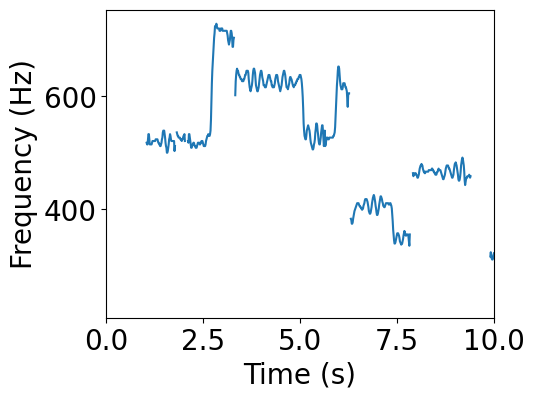

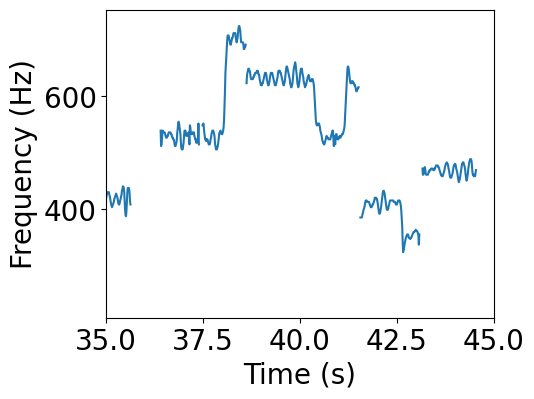

In [14]:
newf0, _, _ = librosa.pyin(y, fmin=45, fmax=1005, hop_length=256, frame_length=1024)
fig, ax = plt.subplots(figsize=(5, 4))
timec = len(y) / (sr * len(newf0))
x = []
for i in range(len(newf0)):
    x.append(i * timec)
plt.plot(x, newf0)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0,10)

fig2, ax = plt.subplots(figsize=(5, 4))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.plot(x, newf0)
plt.xlim(35,45)

0.007873929868701376


Text(0, 0.5, 'Jitter')

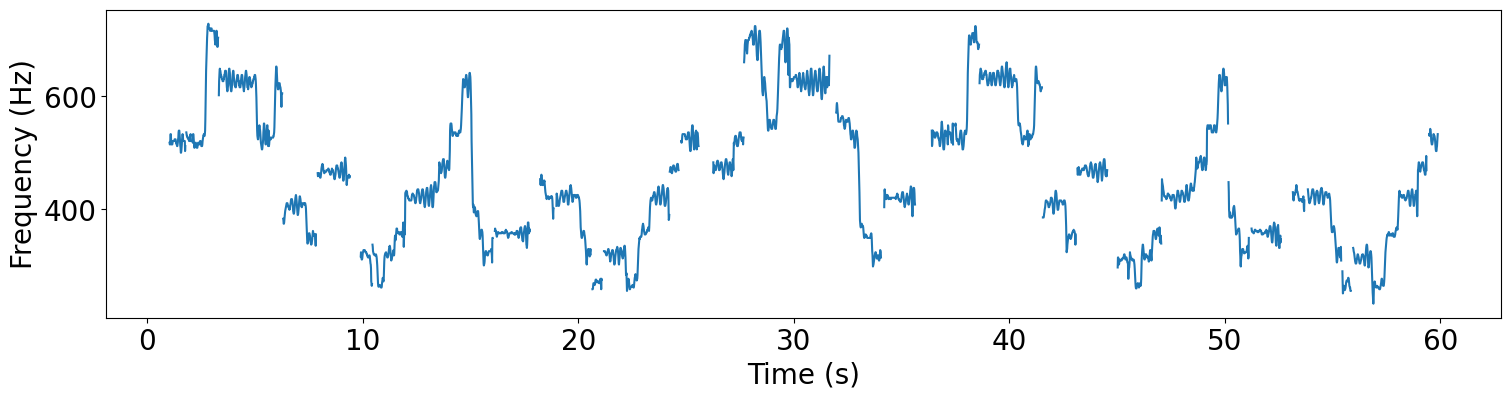

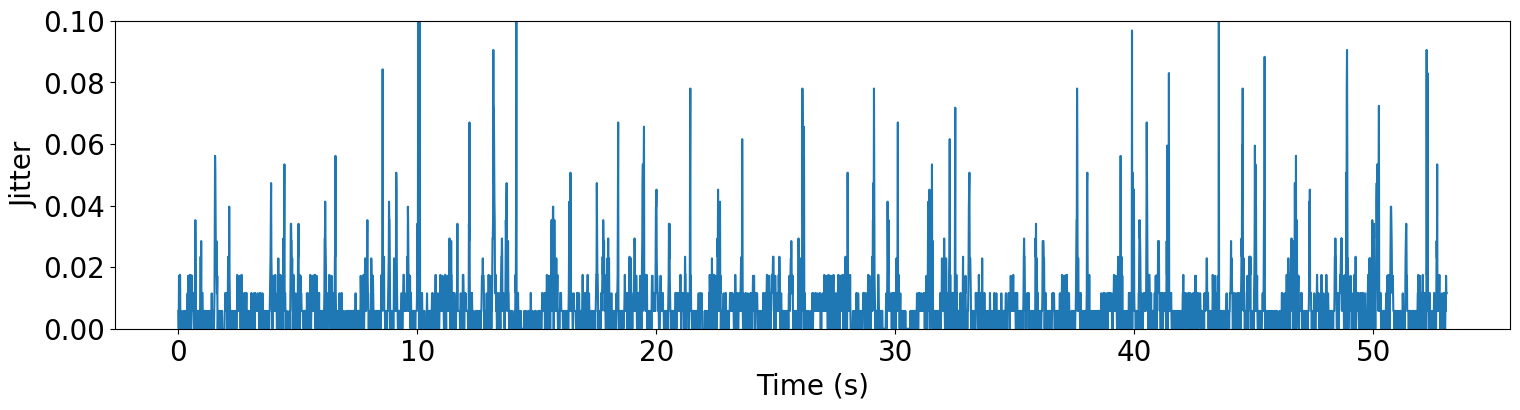

In [15]:
newf0, _, _=librosa.pyin(y,fmin=45,fmax=1005,hop_length=256,frame_length=1024)
fig, ax = plt.subplots(figsize=(18,4))
timec= len(y)/(sr*len(newf0))
x=[]
for i in range(len(newf0)):
               x.append(i*timec)
plt.plot(x, newf0)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')


jitter=[]
denominator = 0
numerator = 0
for i in range(len(newf0)-1):
    # print(newf0[i+1])
    if (np.isnan(newf0[i+1]) or np.isnan(newf0[i])): continue
    # print(newf0[i+1], newf0[i])
    numerator += np.abs(newf0[i+1]-newf0[i])
    denominator += newf0[i+1]
    # print(newf0[i])
    delta=np.abs(newf0[i+1]-newf0[i])/newf0[i+1]
#     if delta>0.1:
#         if i!=0:
#             delta=jitter[i-1]
    jitter.append(delta)

numerator = numerator / (len(newf0)-1)
denominator = denominator / len(newf0)
# print(numerator)
# print(denominator)
print(numerator/denominator)

fig, ax = plt.subplots(figsize=(18,4))
timec= len(y)/(sr*len(newf0))
x=[]
for i in range(len(jitter)):
               x.append(i*timec)
# print(len(x))
# print(len(jitter))
plt.plot(x,jitter)
plt.ylim(0,0.1)
plt.xlabel('Time (s)')
plt.ylabel('Jitter')

0.03355417579316745


Text(0, 0.5, 'Shimmer')

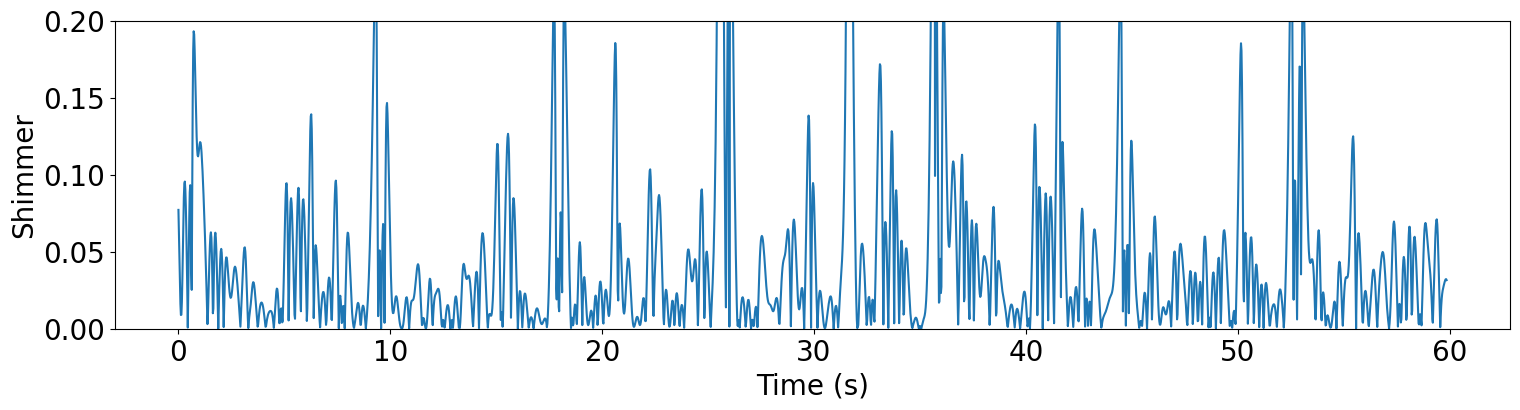

In [16]:
shimmer=[]
ae_source_hop = amplitude_envelope_hop(y, FRAME_SIZE, HOP_LENGTH)
cutoff_freq = 1200
denominator = 0
numerator = 0
envelope = apply_lowpass_filter(ae_source_hop, sr, cutoff_freq)
for i in range(len(envelope)-1):
    numerator += np.abs(envelope[i+1]-envelope[i])
    denominator += envelope[i+1]
    delta=np.abs(envelope[i+1]-envelope[i])/envelope[i+1]
    shimmer.append(delta)
numerator = numerator / (len(newf0)-1)
denominator = denominator / len(newf0)
print(numerator/denominator)
t = librosa.frames_to_time(range(len(shimmer)), hop_length=HOP_LENGTH)
# t=t[:len(t)-1]
fig, ax = plt.subplots(figsize=(18,4))
plt.plot(t,shimmer)
plt.ylim(0,0.2)
plt.xlabel('Time (s)')
plt.ylabel('Shimmer')

# Narrowband Spectrogram analysis

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

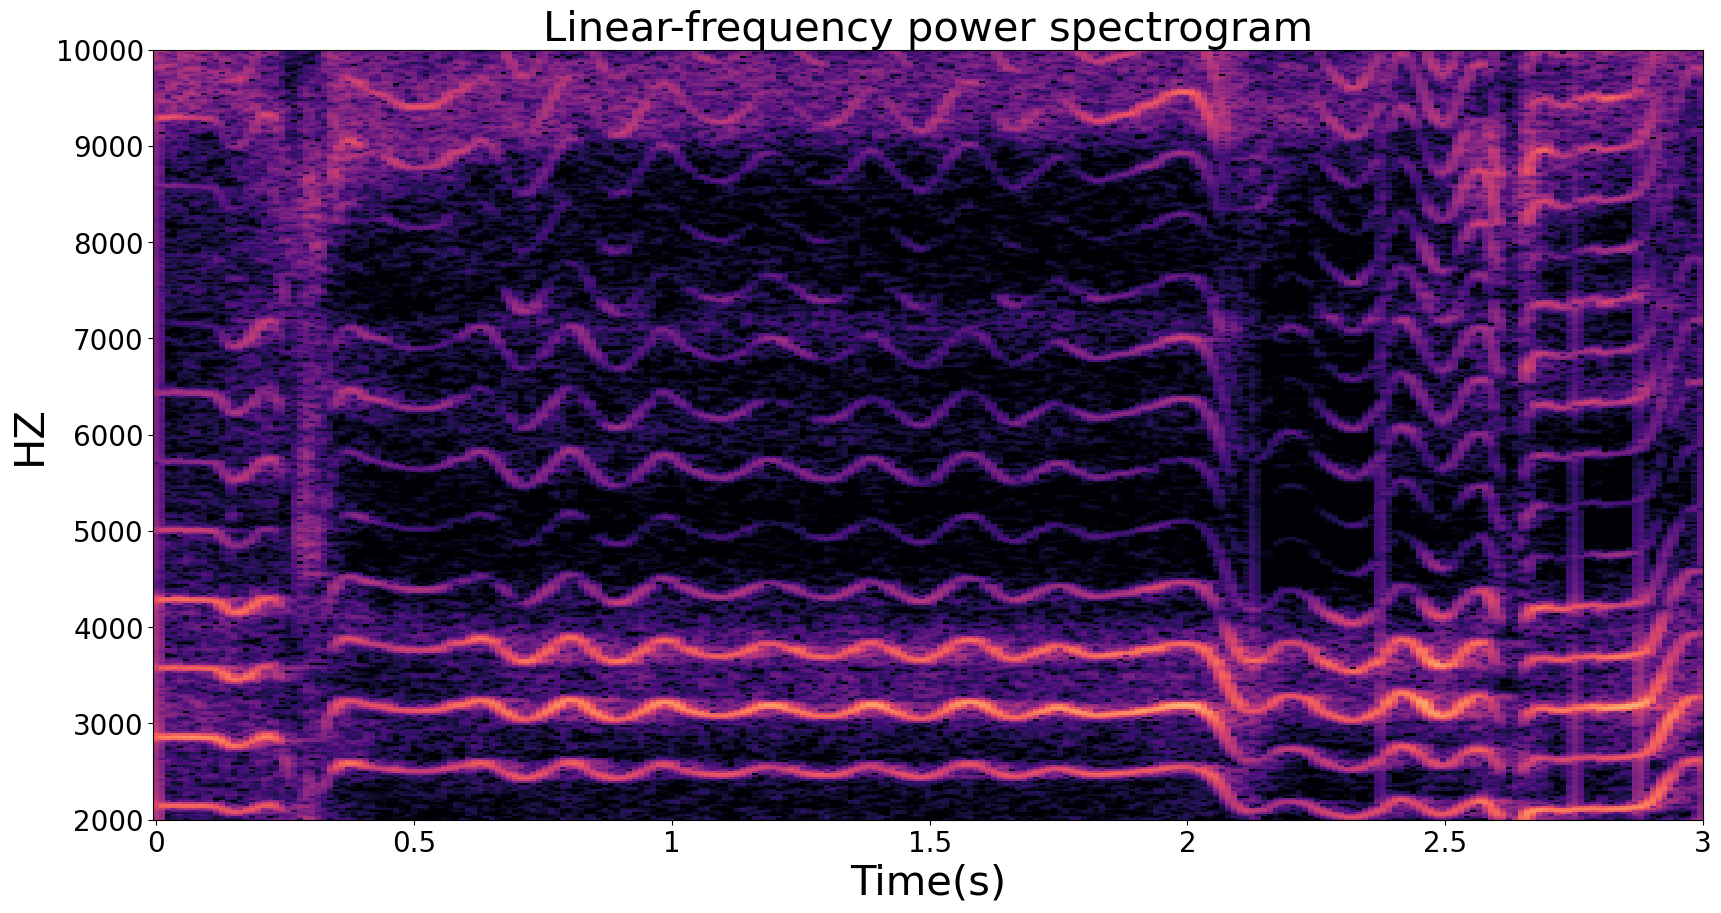

In [3]:
fig, ax = plt.subplots(figsize=(20,10))
n_fft = 1024
hop_length = int(n_fft*0.25)

start = 3
dur = 3
end_point = start * sr + dur * sr
start_point = start * sr
excerpt = y[start_point:end_point]

D = librosa.amplitude_to_db(np.abs(librosa.stft(excerpt,n_fft=n_fft,hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D,x_axis="time",y_axis='linear',hop_length=hop_length, ax=ax)
plt.ylim([2000,10000])
#设置横纵坐标轴显示数字大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#设置colorbar的字体大小
plt.rcParams['font.size'] = 20
#设置两个坐标轴lable的字体大小
ax.set_xlabel('Time(s)', fontsize=30)
ax.set_ylabel("HZ",fontsize=30)
ax.set_title("Linear-frequency power spectrogram",fontsize=30)

# Long Term Average Spectrogram

/tmp/ipykernel_44468/2196718673.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  poly=Polygon(bianjie,facecolor="0.9",edgecolor="0.7",color="royalblue")


(0.0, 8000.0)

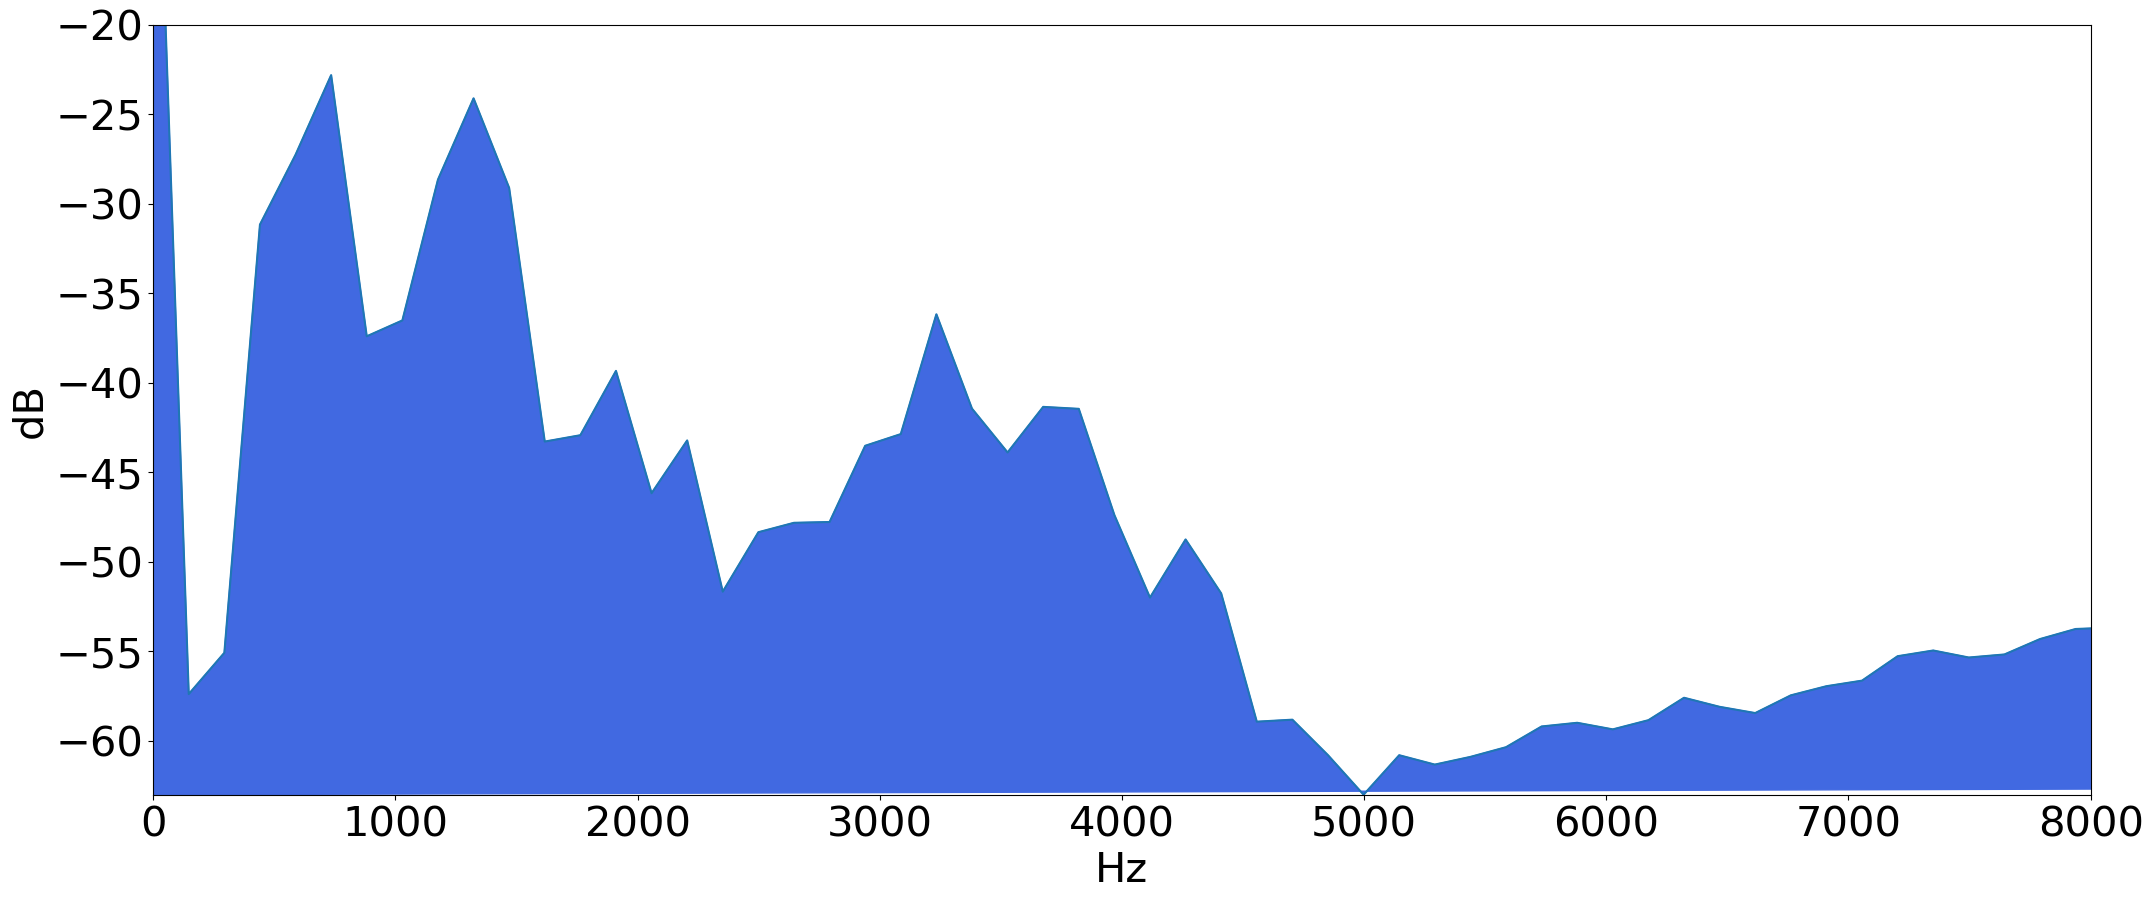

In [12]:
from scipy.fftpack import fft, fftshift, ifft
A= np.abs(fft(y))
ps=A**2/len(A)
ps=ps[:int(len(ps)/2)]
B = librosa.power_to_db(ps)
#显示处理
binc=int(len(y)/150)
binp=[]
p=0
pingjun=0
for i in range(len(B)):
    if i<binc*p:
        pingjun=pingjun+B[i]
    if i>binc*p:
        p=p+1
        binp.append(pingjun/binc)
        pingjun=0
        pingjun=pingjun+B[i]

sr=22050
deltaf=sr/len(y)
deltbinf=deltaf*binc
fig, ax = plt.subplots(figsize=(25,10))
fx=[]
for i in range(len(binp)):
    fx.append(i*deltbinf)
plt.plot(fx,binp)
ix= fx
iy= binp
ixy=zip(ix,iy)
bianjie=[(0,np.min(binp))]+list(ixy)+[(len(ix),np.min(binp))]
from matplotlib.patches import Polygon
poly=Polygon(bianjie,facecolor="0.9",edgecolor="0.7",color="royalblue")
ax.add_patch(poly)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#设置两个坐标轴lable的字体大小
ax.set_xlabel('Hz', fontsize=30)
ax.set_ylabel("dB",fontsize=30)
ax.set_ylim(np.min(binp),-20)
ax.set_xlim(0,8000)

# Formants detection

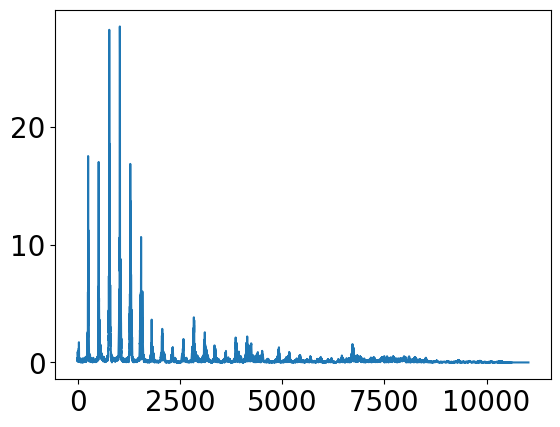

In [14]:
y,sr = librosa.load("./嗓音测试数据/剪切3.wav")
newy=[]
newy.append([])
k=0
count=0
for i in range(len(y)):
    if count<10000:
        newy[k].append(y[i])
    if y[i]==0:
        count=count+1
        if count>=10000:
            count=0
            del newy[k][-10000:]
            k=k+1
            newy.append([])
i=0
while i!=len(newy):
    if len(newy[i])==0:
        del newy[i]
    else:
        i=i+1

def local_maxium(x):
    d = np.diff(x)
    l_d = len(d)
    maxium = []
    loc = []
    for i in range(l_d - 1):
        if d[i] > 0 and d[i + 1] <= 0:
            maxium.append(x[i + 1])
            loc.append(i + 1)
    return maxium, loc

def Formant_Cepst(u, cepstL):
    wlen2 = len(u) // 2
    u_fft=np.fft.fft(u)                         #按式（2-1）计算
    U = np.log(np.abs( u_fft[:wlen2]))
    Cepst = np.fft.ifft(U)                      #按式（2-2）计算
    cepst = np.zeros(wlen2, dtype=np.complex)
    cepst[:cepstL] = Cepst[:cepstL]             #按式（2-3）计算
    cepst[-cepstL + 1:] = Cepst[-cepstL + 1:]  #取第二个式子的相反
    spec = np.real(np.fft.fft(cepst))
    val, loc = local_maxium(spec)               #在包络线上寻找极大值
    return val, loc, spec

B=np.abs(fft(newy[20]))
ix=librosa.fft_frequencies(sr=22050, n_fft=len(B))
C=B[0:len(ix)]
plt.plot(ix,C)

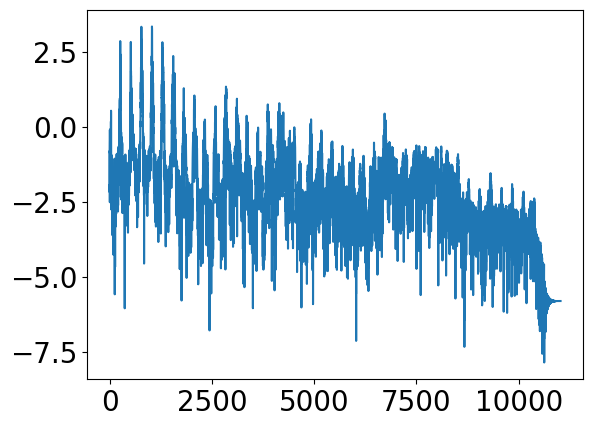

In [15]:
A=np.log(np.abs(fft(newy[20])))
#B=fft(ifft(A))
ix=librosa.fft_frequencies(sr=22050, n_fft=len(A))
C=A[0:len(ix)]
plt.plot(ix,C)

/tmp/ipykernel_44468/1253981383.py:52: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cepst = np.zeros(wlen2, dtype=np.complex)


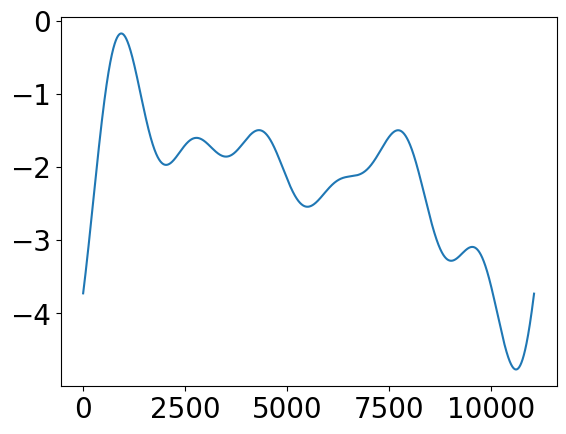

In [21]:
val,loc,spec=Formant_Cepst(newy[20],7)
x=[]
for i in range(len(spec)):
    x.append(22.1*i/len(newy[20])*1000)
    # print(x)
plt.plot(x,spec)